In [35]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from tslearn.datasets import UCR_UEA_datasets
import sklearn
import pickle
import numpy as np
import torch
from ClassificationModels.CNN_T import ResNetBaseline, UCRDataset
import warnings
warnings.filterwarnings("ignore")

In [36]:
dataset='ElectricDevices'

In [37]:
train_x,train_y, test_x, test_y=UCR_UEA_datasets().load_dataset(dataset)
train_x = train_x.reshape(-1,1,  train_x.shape[-2])
test_x = test_x.reshape(-1,1,  test_x.shape[-2])

In [38]:
enc1=sklearn.preprocessing.OneHotEncoder(sparse=False).fit(np.vstack((train_y.reshape(-1,1),test_y.reshape(-1,1))))
f= open(f'one_hot/{dataset}_OneHotEncoder.pkl','wb')
pickle.dump(enc1,f)

train_y=enc1.transform(train_y.reshape(-1,1))
test_y=enc1.transform(test_y.reshape(-1,1))


In [39]:
n_pred_classes =train_y.shape[1]
train_dataset = UCRDataset(train_x.astype(np.float64),train_y.astype(np.int64))
test_dataset = UCRDataset(test_x.astype(np.float64),test_y.astype(np.int64))
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=16,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=1,shuffle=False)
model = ResNetBaseline(in_channels=1, num_pred_classes=n_pred_classes)




In [40]:
from ClassificationModels.CNN_T import fit
fit(model,train_loader,test_loader, num_epochs=1)

Epoch: 1, Train loss: 0.856, Val loss: 1.59


In [41]:
torch.save(model.state_dict(), f'ClassificationModels/{dataset}_ResNet')

In [42]:
state_dict= torch.load( f'ClassificationModels/{dataset}_ResNet')
model.load_state_dict(state_dict)

<All keys matched successfully>

In [43]:
model.eval()
item=test_x[20].reshape(1,1,-1)
shape=item.shape
_item=  torch.from_numpy(item).float()
model.eval()
y_target = torch.nn.functional.softmax(model(_item)).detach().numpy()

In [ ]:
from TSInterpret.InterpretabilityModels.counterfactual.NativeGuideCF \
     import NativeGuideCF
exp_model=NativeGuideCF(model,(train_x,train_y), \
    backend='PYT', mode='feat',method='NUN_CF')

Lenght: 96


In [30]:
exp,label=exp_model.explain(item, np.argmax(y_target,axis=1)[0])

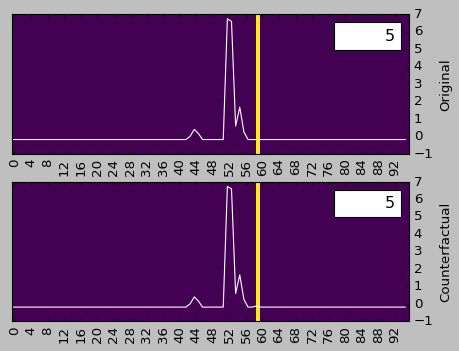

In [31]:

exp_model.plot(item,np.argmax(y_target,axis=1)[0],exp,label)

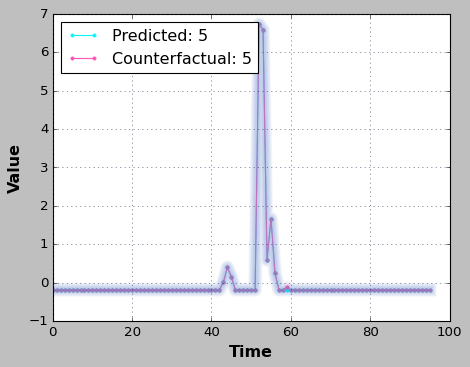

In [32]:
exp_model.plot_in_one(item,np.argmax(y_target,axis=1)[0],exp,label)

In [33]:
exp

array([[-0.18613849, -0.18613849, -0.18613849, -0.18613849, -0.18613849,
        -0.18613849, -0.18613849, -0.18613849, -0.18613849, -0.18613849,
        -0.18613849, -0.18613849, -0.18613849, -0.18613849, -0.18613849,
        -0.18613849, -0.18613849, -0.18613849, -0.18613849, -0.18613849,
        -0.18613849, -0.18613849, -0.18613849, -0.18613849, -0.18613849,
        -0.18613849, -0.18613849, -0.18613849, -0.18613849, -0.18613849,
        -0.18613849, -0.18613849, -0.18613849, -0.18613849, -0.18613849,
        -0.18613849, -0.18613849, -0.18613849, -0.18613849, -0.18613849,
        -0.18613849, -0.18613849, -0.18613849,  0.00862222,  0.39814363,
         0.15469275, -0.18613849, -0.18613849, -0.18613849, -0.18613849,
        -0.18613849, -0.18613849,  6.7278666 ,  6.5817961 ,  0.59290434,
         1.6640882 ,  0.2520731 , -0.18613849, -0.18613849, -0.12316843,
        -0.18613849, -0.18613849, -0.18613849, -0.18613849, -0.18613849,
        -0.18613849, -0.18613849, -0.18613849, -0.1

In [34]:
item[0]


array([[-0.18613849, -0.18613849, -0.18613849, -0.18613849, -0.18613849,
        -0.18613849, -0.18613849, -0.18613849, -0.18613849, -0.18613849,
        -0.18613849, -0.18613849, -0.18613849, -0.18613849, -0.18613849,
        -0.18613849, -0.18613849, -0.18613849, -0.18613849, -0.18613849,
        -0.18613849, -0.18613849, -0.18613849, -0.18613849, -0.18613849,
        -0.18613849, -0.18613849, -0.18613849, -0.18613849, -0.18613849,
        -0.18613849, -0.18613849, -0.18613849, -0.18613849, -0.18613849,
        -0.18613849, -0.18613849, -0.18613849, -0.18613849, -0.18613849,
        -0.18613849, -0.18613849, -0.18613849,  0.00862222,  0.39814363,
         0.15469275, -0.18613849, -0.18613849, -0.18613849, -0.18613849,
        -0.18613849, -0.18613849,  6.7278666 ,  6.5817961 ,  0.59290434,
         1.6640882 ,  0.2520731 , -0.18613849, -0.18613849, -0.18613849,
        -0.18613849, -0.18613849, -0.18613849, -0.18613849, -0.18613849,
        -0.18613849, -0.18613849, -0.18613849, -0.1